In [9]:
import numpy as np

samples = ["The cat sat on the mat.", "The dog ate my homework."]
token_index = {}
for sample in samples:
    for word in sample.split():
        if word not in token_index:
            token_index[word] = len(token_index) + 1
results = np.zeros((len(samples), max_length, max(token_index.values())+1))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split())):
        index = token_index.get(word)
        results[i, j, index] = 1
results

array([[[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]],

       [[0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0

In [10]:
import string
samples = ["The cat sat on the mat.", "The dog ate my homework."]
characters = string.printable
token_index = dict(zip(characters, range(1, len(characters) + 1)))

max_length = 10
results = np.zeros((len(samples), max_length, max(token_index.values()) + 1))
for i, sample in enumerate(samples):
    for j, character in enumerate(sample[:max_length]):
        index = token_index.get(character)
        results[i, j, index] = 1
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [13]:
from tensorflow.keras.preprocessing.text import Tokenizer

samples = ["The cat sat on the mat.", "The dog ate my homework."]
tokenizer = Tokenizer(num_words=1000)
tokenizer.fit_on_texts(samples)
sequences = tokenizer.texts_to_sequences(samples)

one_hot_results = tokenizer.texts_to_matrix(samples, mode="binary")
word_index = tokenizer.word_index
print(len(word_index))

9


In [32]:
samples = ["The cat sat on the mat.", "The dog ate my homework."]
dimentionality = 1000
max_length = 10

results = np.zeros((len(samples), max_length, dimentionality))
for i, sample in enumerate(samples):
    for j, word in list(enumerate(sample.split()))[:max_length]:
        index = abs(hash(word)) % dimentionality
        results[i, j, index] = 1.

In [33]:
results

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]])

In [ ]:
from tensorflow.keras.layers import Embedding
embedding_layer = Embedding(1000, 64)

In [1]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras import preprocessing
import tensorflow as tf
with tf.device("/cpu:0"):
    max_features = 10000
    max_len = 20

    (x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

    x_train = preprocessing.sequence.pad_sequences(x_train, maxlen=max_len)
    x_test = preprocessing.sequence.pad_sequences(x_test, maxlen=max_len)

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:159: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
C:\Users\galin\anaconda3\lib\site-packages\tensorflow\python\keras\datasets\imdb.py:160: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Embedding
with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(10000, 8, input_length=max_len))
    model.add(Flatten())
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
    model.summary()
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_split=0.2)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 20, 8)             80000     
_________________________________________________________________
flatten (Flatten)            (None, 160)               0         
_________________________________________________________________
dense (Dense)                (None, 1)                 161       
Total params: 80,161
Trainable params: 80,161
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
625/625 [==============================] - 2s 3ms/step - loss: 0.6854 - acc: 0.5684 - val_loss: 0.6169 - val_acc: 0.6976
Epoch 2/10
625/625 [==============================] - 1s 1ms/step - loss: 0.5664 - acc: 0.7441 - val_loss: 0.5252 - val_acc: 0.7308
Epoch 3/10
625/625 [==============================] - 1s 964us/step - loss: 0.4643 - acc: 0.7876 - val_loss: 0.5005 - 

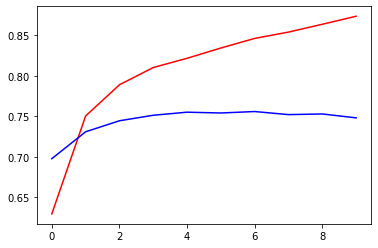

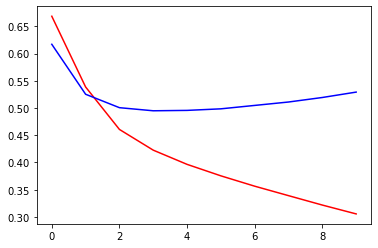

In [5]:
import matplotlib.pyplot as plt

with tf.device("/cpu:0"):
    x = range(len(history.history["acc"]))
    plt.plot(x, history.history["acc"], "r")
    plt.plot(x, history.history["val_acc"], "b")
    plt.figure()
    
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()

In [9]:
import os

home = os.path.expanduser("~") 
imdb_dir = os.path.join(home, "Downloads/Python/aclImdb")
train_dir = os.path.join(imdb_dir, "train")
labels = []
texts = []
for label_type in ["neg", "pos"]:
    dir_name = os.path.join(train_dir, label_type)
    for fname in os.listdir(dir_name):
        if fname[-4:] == ".txt":
            f = open(os.path.join(dir_name, fname), encoding="utf-8")
            texts.append(f.read())
            f.close()
            if label_type == "neg":
                labels.append(0)
            else:
                labels.append(1)

In [14]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import numpy as np

with tf.device("/cpu:0"):
    max_len = 100
    training_samples = 200
    validation_samples = 10000
    max_words = 10000

    tokenizer = Tokenizer(num_words=max_words)
    tokenizer.fit_on_texts(texts)
    sequences = tokenizer.texts_to_sequences(texts)
    word_index = tokenizer.word_index
    print("word_index_length", len(word_index))

    data = pad_sequences(sequences, maxlen=max_len)

    labels = np.asarray(labels)
    print("data_shape", data.shape)
    print("labels_shape", labels.shape)

    indices = np.arange(data.shape[0])
    np.random.shuffle(indices)
    data = data[indices]
    labels = labels[indices]

    x_train = data[:training_samples]
    y_train = labels[:training_samples]
    x_val = data[training_samples: training_samples + validation_samples]
    y_val = labels[training_samples: training_samples + validation_samples]

word_index_length 88582
data_shape (25000, 100)
labels_shape (25000,)


In [15]:
glove_dir = os.path.join(home, "Downloads/Python/glove.6B")

embeddings_index = {}
f = open(os.path.join(glove_dir, "glove.6B.100d.txt"), encoding="utf-8")
for line in f:
    values = line.split()
    word = values[0]
    coefs = np.asarray(values[1:], dtype="float32")
    embeddings_index[word] = coefs
f.close()
print(len(embeddings_index))

400000


In [18]:
embedding_dim = 100
embedding_matrix = np.zeros((max_words, embedding_dim))
for word, i in word_index.items():
    embedding_vector = embeddings_index.get(word)
    if i < max_words:
        if embedding_vector is not None:
            embedding_matrix[i] = embedding_vector

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 100, 100)          1000000   
_________________________________________________________________
flatten_1 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 32)                320032    
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,320,065
Trainable params: 1,320,065
Non-trainable params: 0
_________________________________________________________________
Epoch 1/10
7/7 [==============================] - 2s 139ms/step - loss: 2.0736 - acc: 0.5919 - val_loss: 1.0716 - val_acc: 0.4988
Epoch 2/10
7/7 [==============================] - 1s 88ms/step - loss: 0.7347 - acc: 0.5957 - val_loss: 0.6969 -

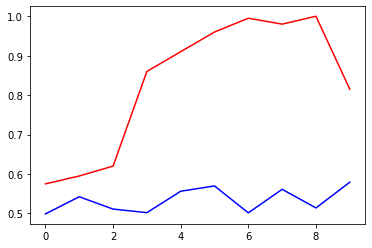

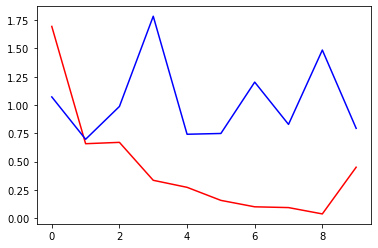

In [19]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Flatten, Dense

with tf.device("/cpu:0"):
    model = Sequential()
    model.add(Embedding(max_words, embedding_dim, input_length=max_len))
    model.add(Flatten())
    model.add(Dense(32, activation="relu"))
    model.add(Dense(1, activation="sigmoid"))
    model.summary()
    
    model.layers[0].set_weights([embedding_matrix])
    model.layers[0].trainable = False
    
    model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["acc"])
    
    history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_val, y_val))
#     model.save_weights("pre_trained_glove_model.h5")
    
    x = range(len(history.history["acc"]))
    plt.plot(x, history.history["acc"], "r")
    plt.plot(x, history.history["val_acc"], "b")
    plt.figure()
    
    plt.plot(x, history.history["loss"], "r")
    plt.plot(x, history.history["val_loss"], "b")
    plt.show()